# Word- Detection (Augmented_Data)

## Packages

In [1]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
import uuid
import json
import tensorflow as tf
from sklearn.model_selection import train_test_split
import importlib
import albumentations as A
import random
import os
import cv2
from sklearn.model_selection import train_test_split

## Utility Functions

In [2]:
from lib import load_data as DL
from lib import tf_DataSet as tf_d
from lib import F_Plots as MyPlot
from lib import IoU as iou
from lib import augmetation as Aug
importlib.reload(DL)
importlib.reload(tf_d) 
importlib.reload(MyPlot) 
importlib.reload(iou)
importlib.reload(Aug) 

<module 'lib.augmetation' from 'C:\\Users\\danil\\TensorFlow\\workspace\\UDEA_Object_Detection_Project\\Notebooks\\lib\\augmetation.py'>

# Load Normal - Data 

In [3]:
Data_Path = "../data/img"
df = DL.xml_to_csv(Data_Path)
df['_xmin'] = df['xmin']/df['width']
df['_ymin'] = df['ymin']/df['height']
df['_xmax'] = df['xmax']/df['width']
df['_ymax'] = df['ymax']/df['height']
_class = {"Logo" : 1 , "Thanks" : 2 , "Total":3 , "Change" : 4}
df["class"] = df["class"].map(_class)

# imporbtlib.reload(DL) 
# dic = {'Formato_1': 1, 'Formato_2': 2 ,'Formato_3': 3}
# Data_Normal = DL.create_and_read_metadata(images_path=  'local/data/imgs' ,medata_path= 'local/data' ,name_file = "metadata_02.csv" ,split_value= 0.7 , labels_dic=dic)

df_a = df[["filename","_xmin","_xmax","_ymin","_ymax","class"]]

df_a.head()

,filename,_xmin,_xmax,_ymin,_ymax,class
0,000.jpg,0.123110,0.719222,0.017769,0.063179,1
1,000.jpg,0.373650,0.667387,0.685094,0.720632,3
2,000.jpg,0.332613,0.738661,0.923001,0.972359,2
3,000.jpg,0.434125,0.652268,0.757157,0.785785,4
4,001.jpg,0.118451,0.854214,0.881474,0.964143,2


In [4]:
df.shape

(533, 12)

## Parametros de Aumento

In [5]:
bbox_params = A.BboxParams(
  format='pascal_voc', 
  min_area=1, 
  min_visibility=0.5, 
  label_fields=['field_id']
)

doc_aug_c = A.Compose([
    A.Flip(p=0.25),
    A.RandomGamma(gamma_limit=(20, 300), p=0.5),
    A.RandomBrightnessContrast(p=0.85),
    A.Rotate(limit=35, p=0.9),
    A.RandomRotate90(p=0.25),
    A.RGBShift(p=0.75),
    A.GaussNoise(p=0.25)
], bbox_params=bbox_params)



In [6]:
importlib.reload(Aug) 

IMAGES_PATH = '../data/img/'
DATASET_PATH = '../data/augmented'
IMAGES_PATH_SAVE = f'{DATASET_PATH}/img'
NAME_FILE = "augmented_v1.csv"

Data_Augmented  = Aug.augmented_fuction(
    img_Aug = 6,
    Data = df_a,
    doc_aug = doc_aug_c,
    DATASET_PATH = DATASET_PATH ,
    IMAGES_PATH_SAVE = IMAGES_PATH_SAVE,
    IMAGES_PATH = IMAGES_PATH,
    NAME_FILE = NAME_FILE
)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.98it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.66it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 14.39it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 53.07it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 10.85it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.86it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 24.92it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 26.20it/s]


## Data Augmented

In [7]:
Data_Augmented_P  = Data_Augmented.copy()

In [8]:
Data_Augmented.head()

,filename,xmin,xmax,ymin,ymax,class
0,1_form_aug_0.jpg,103,380,0,35,1
1,1_form_aug_1.jpg,323,463,0,146,1
2,1_form_aug_2.jpg,277,463,0,118,1
3,1_form_aug_3.jpg,167,441,0,63,1
4,1_form_aug_4.jpg,163,437,0,62,1


In [9]:
Data_Augmented.shape

(3023, 6)

In [10]:
x_len  = []
y_len = []
for i in Data_Augmented_P.iterrows():
    form = cv2.imread(os.path.join(IMAGES_PATH_SAVE,i[1][0]))
    len_y, len_x , _ = form.shape
    x_len.append(len_x)
    y_len.append(len_y)


In [11]:
Data_Augmented_P["x_len"] = pd.Series(x_len)
Data_Augmented_P["y_len"] = pd.Series(y_len) 

In [12]:
Data_Augmented_P['_xmin'] = Data_Augmented_P['xmin']/Data_Augmented_P['x_len']
Data_Augmented_P['_ymin'] = Data_Augmented_P['ymin']/Data_Augmented_P['y_len']
Data_Augmented_P['_xmax'] = Data_Augmented_P['xmax']/Data_Augmented_P['x_len']
Data_Augmented_P['_ymax'] = Data_Augmented_P['ymax']/Data_Augmented_P['y_len']

Data_Augmented_P

,filename,xmin,xmax,ymin,ymax,class,x_len,y_len,_xmin,_ymin,_xmax,_ymax
0,1_form_aug_0.jpg,103,380,0,35,1,463,1013,0.222462,0.000000,0.820734,0.034551
1,1_form_aug_1.jpg,323,463,0,146,1,463,1013,0.697624,0.000000,1.000000,0.144126
2,1_form_aug_2.jpg,277,463,0,118,1,463,1013,0.598272,0.000000,1.000000,0.116486
3,1_form_aug_3.jpg,167,441,0,63,1,463,1013,0.360691,0.000000,0.952484,0.062192
4,1_form_aug_4.jpg,163,437,0,62,1,463,1013,0.352052,0.000000,0.943844,0.061204
...,...,...,...,...,...,...,...,...,...,...,...,...
3018,533_form_aug_1.jpg,142,231,741,787,4,616,1192,0.230519,0.621644,0.375000,0.660235
3019,533_form_aug_2.jpg,317,406,388,403,4,616,1192,0.514610,0.325503,0.659091,0.338087
3020,533_form_aug_3.jpg,272,363,372,405,4,616,1192,0.441558,0.312081,0.589286,0.339765
3021,533_form_aug_4.jpg,336,426,390,413,4,616,1192,0.545455,0.327181,0.691558,0.346477


### Split Data Set

In [13]:
train , test = train_test_split(Data_Augmented_P, shuffle=True)

In [14]:
train

,filename,xmin,xmax,ymin,ymax,class,x_len,y_len,_xmin,_ymin,_xmax,_ymax
2840,502_form_aug_1.jpg,376,740,98,203,1,932,1783,0.403433,0.054964,0.793991,0.113853
119,21_form_aug_2.jpg,179,272,352,377,4,463,605,0.386609,0.581818,0.587473,0.623140
499,89_form_aug_0.jpg,155,375,896,947,2,953,1629,0.162644,0.550031,0.393494,0.581338
1289,222_form_aug_2.jpg,455,552,377,417,3,1080,1527,0.421296,0.246889,0.511111,0.273084
1705,297_form_aug_2.jpg,2021,2059,222,363,4,2785,936,0.725673,0.237179,0.739318,0.387821
...,...,...,...,...,...,...,...,...,...,...,...,...
2637,464_form_aug_5.jpg,430,599,1449,1543,3,932,1975,0.461373,0.733671,0.642704,0.781266
728,127_form_aug_2.jpg,169,229,911,950,4,1080,1527,0.156481,0.596595,0.212037,0.622135
872,151_form_aug_2.jpg,417,586,717,772,2,1080,1527,0.386111,0.469548,0.542593,0.505566
427,76_form_aug_3.jpg,31,282,394,432,2,447,915,0.069351,0.430601,0.630872,0.472131


In [15]:
test

,filename,xmin,xmax,ymin,ymax,class,x_len,y_len,_xmin,_ymin,_xmax,_ymax
328,58_form_aug_0.jpg,355,452,523,538,3,780,2044,0.455128,0.255871,0.579487,0.263209
1683,293_form_aug_0.jpg,420,837,152,277,1,936,1676,0.448718,0.090692,0.894231,0.165274
1766,308_form_aug_4.jpg,599,932,48,243,1,932,2168,0.642704,0.022140,1.000000,0.112085
1953,344_form_aug_5.jpg,10,202,414,741,1,1733,741,0.005770,0.558704,0.116561,1.000000
2871,507_form_aug_2.jpg,49,193,718,746,4,920,1929,0.053261,0.372214,0.209783,0.386729
...,...,...,...,...,...,...,...,...,...,...,...,...
1008,175_form_aug_3.jpg,230,305,855,906,4,1080,1527,0.212963,0.559921,0.282407,0.593320
314,55_form_aug_4.jpg,241,492,1995,2019,1,780,2044,0.308974,0.976027,0.630769,0.987769
849,147_form_aug_3.jpg,572,629,403,491,3,1527,1080,0.374591,0.373148,0.411919,0.454630
667,117_form_aug_1.jpg,864,914,205,297,3,1338,748,0.645740,0.274064,0.683109,0.397059


#  Analysis

## Bounding Box - Coordinates

<AxesSubplot:>

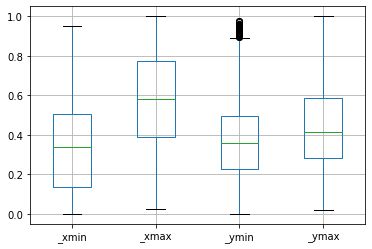

In [16]:
Data_Augmented_P[['_xmin','_xmax','_ymin','_ymax']].boxplot()

In [17]:
train[['filename', 'class', '_xmin', '_ymin', '_xmax', '_ymax']]

,filename,class,_xmin,_ymin,_xmax,_ymax
2840,502_form_aug_1.jpg,1,0.403433,0.054964,0.793991,0.113853
119,21_form_aug_2.jpg,4,0.386609,0.581818,0.587473,0.623140
499,89_form_aug_0.jpg,2,0.162644,0.550031,0.393494,0.581338
1289,222_form_aug_2.jpg,3,0.421296,0.246889,0.511111,0.273084
1705,297_form_aug_2.jpg,4,0.725673,0.237179,0.739318,0.387821
...,...,...,...,...,...,...
2637,464_form_aug_5.jpg,3,0.461373,0.733671,0.642704,0.781266
728,127_form_aug_2.jpg,4,0.156481,0.596595,0.212037,0.622135
872,151_form_aug_2.jpg,2,0.386111,0.469548,0.542593,0.505566
427,76_form_aug_3.jpg,2,0.069351,0.430601,0.630872,0.472131


In [18]:
importlib.reload(tf_d)

tF_train = tf_d.build_sources_from_metadata(train[['filename', 'class', '_xmin', '_ymin', '_xmax', '_ymax',]] , os.path.join("..", "data" , "augmented","img"))
tF_test = tf_d.build_sources_from_metadata(test[['filename', 'class', '_xmin', '_ymin', '_xmax', '_ymax',]] , os.path.join("..", "data" , "augmented","img"))


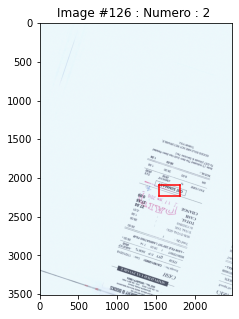

In [20]:
importlib.reload(MyPlot) 
MyPlot.display_random_image(Data_Augmented_P[['filename','_xmin', '_xmax', '_ymin', '_ymax','class']],2,True,image_path = '../data/augmented/img')

## TensorFlow DataSet

In [21]:
tf_Data_train = tf_d.make_tf_dataset(tF_train, training=True,
    batch_size=4, num_epochs=1,
    num_parallel_calls=2)

tf_Data_test = tf_d.make_tf_dataset(tF_test, training=True,
    batch_size=1, num_epochs=1,
    num_parallel_calls=2)

##### Image Plot with bounding box

[0.34814814 0.6388889  0.14285715 0.16194865]
79.02962717413902
145.02777928113937
[0.47826087 1.         0.03888025 0.18558839]
108.5652185678482
227.0
[0.382763   0.54372627 0.6721219  0.6969526 ]
86.88720062375069
123.42586225271225
[0.52896994 0.7017167  0.33701658 0.37983426]
120.07617717981339
159.28969568014145


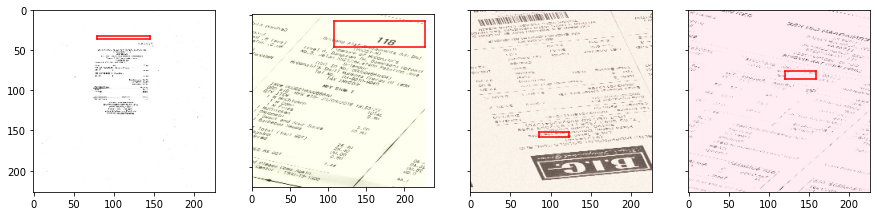

In [22]:
importlib.reload(MyPlot) 
dataset = iter(tf_Data_train)
MyPlot.imshow_batch_of_three(next(dataset),show_box=True, num_images = 4)

# Modelling


In [23]:
# Define a simple sequential model
def create_model():
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(227,227,3)))
    model.add(tf.keras.layers.AveragePooling2D())

    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
    model.add(tf.keras.layers.AveragePooling2D())

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

    model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

    model.add(tf.keras.layers.Dense(units=4, activation = 'sigmoid'))
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(0.0001))

    return model

In [24]:
# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 16)      2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 53, 53, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 44944)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               5393400   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

##### Evaluate DataSet

In [26]:
print(model.evaluate(tf_Data_train))

567/567 [==============================] - 9s 16ms/step - loss: 0.1301
0.13013529777526855


## Fit Model

In [27]:
H = model.fit(x=tf_Data_train, epochs=100,validation_data=tf_Data_test, validation_steps=20)

Epoch 1/100
567/567 [==============================] - 11s 17ms/step - loss: 0.0675 - val_loss: 0.0593
Epoch 2/100
567/567 [==============================] - 10s 17ms/step - loss: 0.0541 - val_loss: 0.0617
Epoch 3/100
567/567 [==============================] - 9s 17ms/step - loss: 0.0541 - val_loss: 0.0637
Epoch 4/100
567/567 [==============================] - 10s 17ms/step - loss: 0.0541 - val_loss: 0.0615
Epoch 5/100
567/567 [==============================] - 9s 17ms/step - loss: 0.0542 - val_loss: 0.0649
Epoch 6/100
567/567 [==============================] - 10s 17ms/step - loss: 0.0540 - val_loss: 0.0618
Epoch 7/100
567/567 [==============================] - 9s 17ms/step - loss: 0.0542 - val_loss: 0.0619
Epoch 8/100
567/567 [==============================] - 10s 17ms/step - loss: 0.0540 - val_loss: 0.0571
Epoch 9/100
567/567 [==============================] - 9s 17ms/step - loss: 0.0541 - val_loss: 0.0595
Epoch 10/100
567/567 [==============================] - 9s 17ms/step - loss: 

567/567 [==============================] - 9s 17ms/step - loss: 0.0537 - val_loss: 0.0625
Epoch 81/100
567/567 [==============================] - 9s 17ms/step - loss: 0.0537 - val_loss: 0.0638
Epoch 82/100
567/567 [==============================] - 9s 17ms/step - loss: 0.0537 - val_loss: 0.0624
Epoch 83/100
567/567 [==============================] - 9s 17ms/step - loss: 0.0537 - val_loss: 0.0613
Epoch 84/100
567/567 [==============================] - 9s 17ms/step - loss: 0.0538 - val_loss: 0.0664
Epoch 85/100
567/567 [==============================] - 9s 17ms/step - loss: 0.0537 - val_loss: 0.0655
Epoch 86/100
567/567 [==============================] - 9s 17ms/step - loss: 0.0537 - val_loss: 0.0607
Epoch 87/100
567/567 [==============================] - 9s 17ms/step - loss: 0.0538 - val_loss: 0.0651
Epoch 88/100
567/567 [==============================] - 9s 17ms/step - loss: 0.0537 - val_loss: 0.0634
Epoch 89/100
567/567 [==============================] - 9s 17ms/step - loss: 0.0537 - 

# Evaluate Results

## Plot training loss

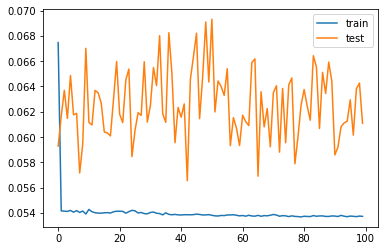

In [28]:
plt.subplot(1,1,1)
plt.plot(H.history['loss'],label='train')
plt.plot(H.history['val_loss'],label='test')
plt.legend()

## Intersection over Union

In the simplest case, segmentation is the process of dividing a digital image into several segments. The result of instance segmentation using Mask R-CNN is a mask applied to the desired object and a bounding box around this object.

[Intersection over union](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/#:~:text=What%20is%20Intersection%20over%20Union,the%20popular%20PASCAL%20VOC%20challenge.) (IoU) is known to be a good metric for measuring overlap between two bounding boxes or masks.

<img src="https://miro.medium.com/max/423/1*2w493Z_V6-sE_3aYa48a9w.png" style="width:40%;">

If the prediction is completely correct, IoU = 1. The lower the IoU, the worse the prediction result.

<img src="https://miro.medium.com/max/646/1*eF0J8KcQqJQF3N0J1vmKwA.png" style="width:40%;">

## Plot Predictions

In [29]:
Data_Predict= model.predict(tf_Data_test)

In [30]:
Data_Predict.shape

(756, 4)

In [31]:
Data_Predict

array([[0.31841186, 0.57183725, 0.361788  , 0.43671983],
       [0.31841186, 0.57183725, 0.361788  , 0.43671983],
       [0.31841186, 0.57183725, 0.361788  , 0.43671983],
       ...,
       [0.31841186, 0.57183725, 0.361788  , 0.43671983],
       [0.31841186, 0.57183725, 0.361788  , 0.43671983],
       [0.31841186, 0.57183725, 0.361788  , 0.43671983]], dtype=float32)

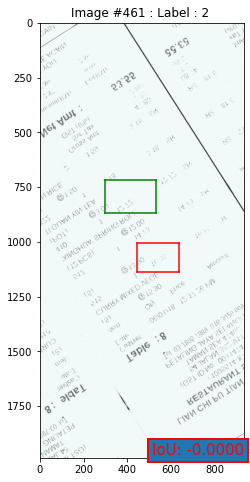

In [44]:
importlib.reload(MyPlot) 
MyPlot.display_random_image_Pre(test[["filename","_xmin","_xmax","_ymin","_ymax","class"]],Data_Predict , image_path='../data/augmented/img',img_save = "Sample_Ag_2.png")

# Save Model

In [133]:
tf.saved_model.save(model, "../models/Custom_Models/Augmented/")


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: ../models/Custom_Models/Augmented/assets
